# [RVR1] PLOT WORKSPACE

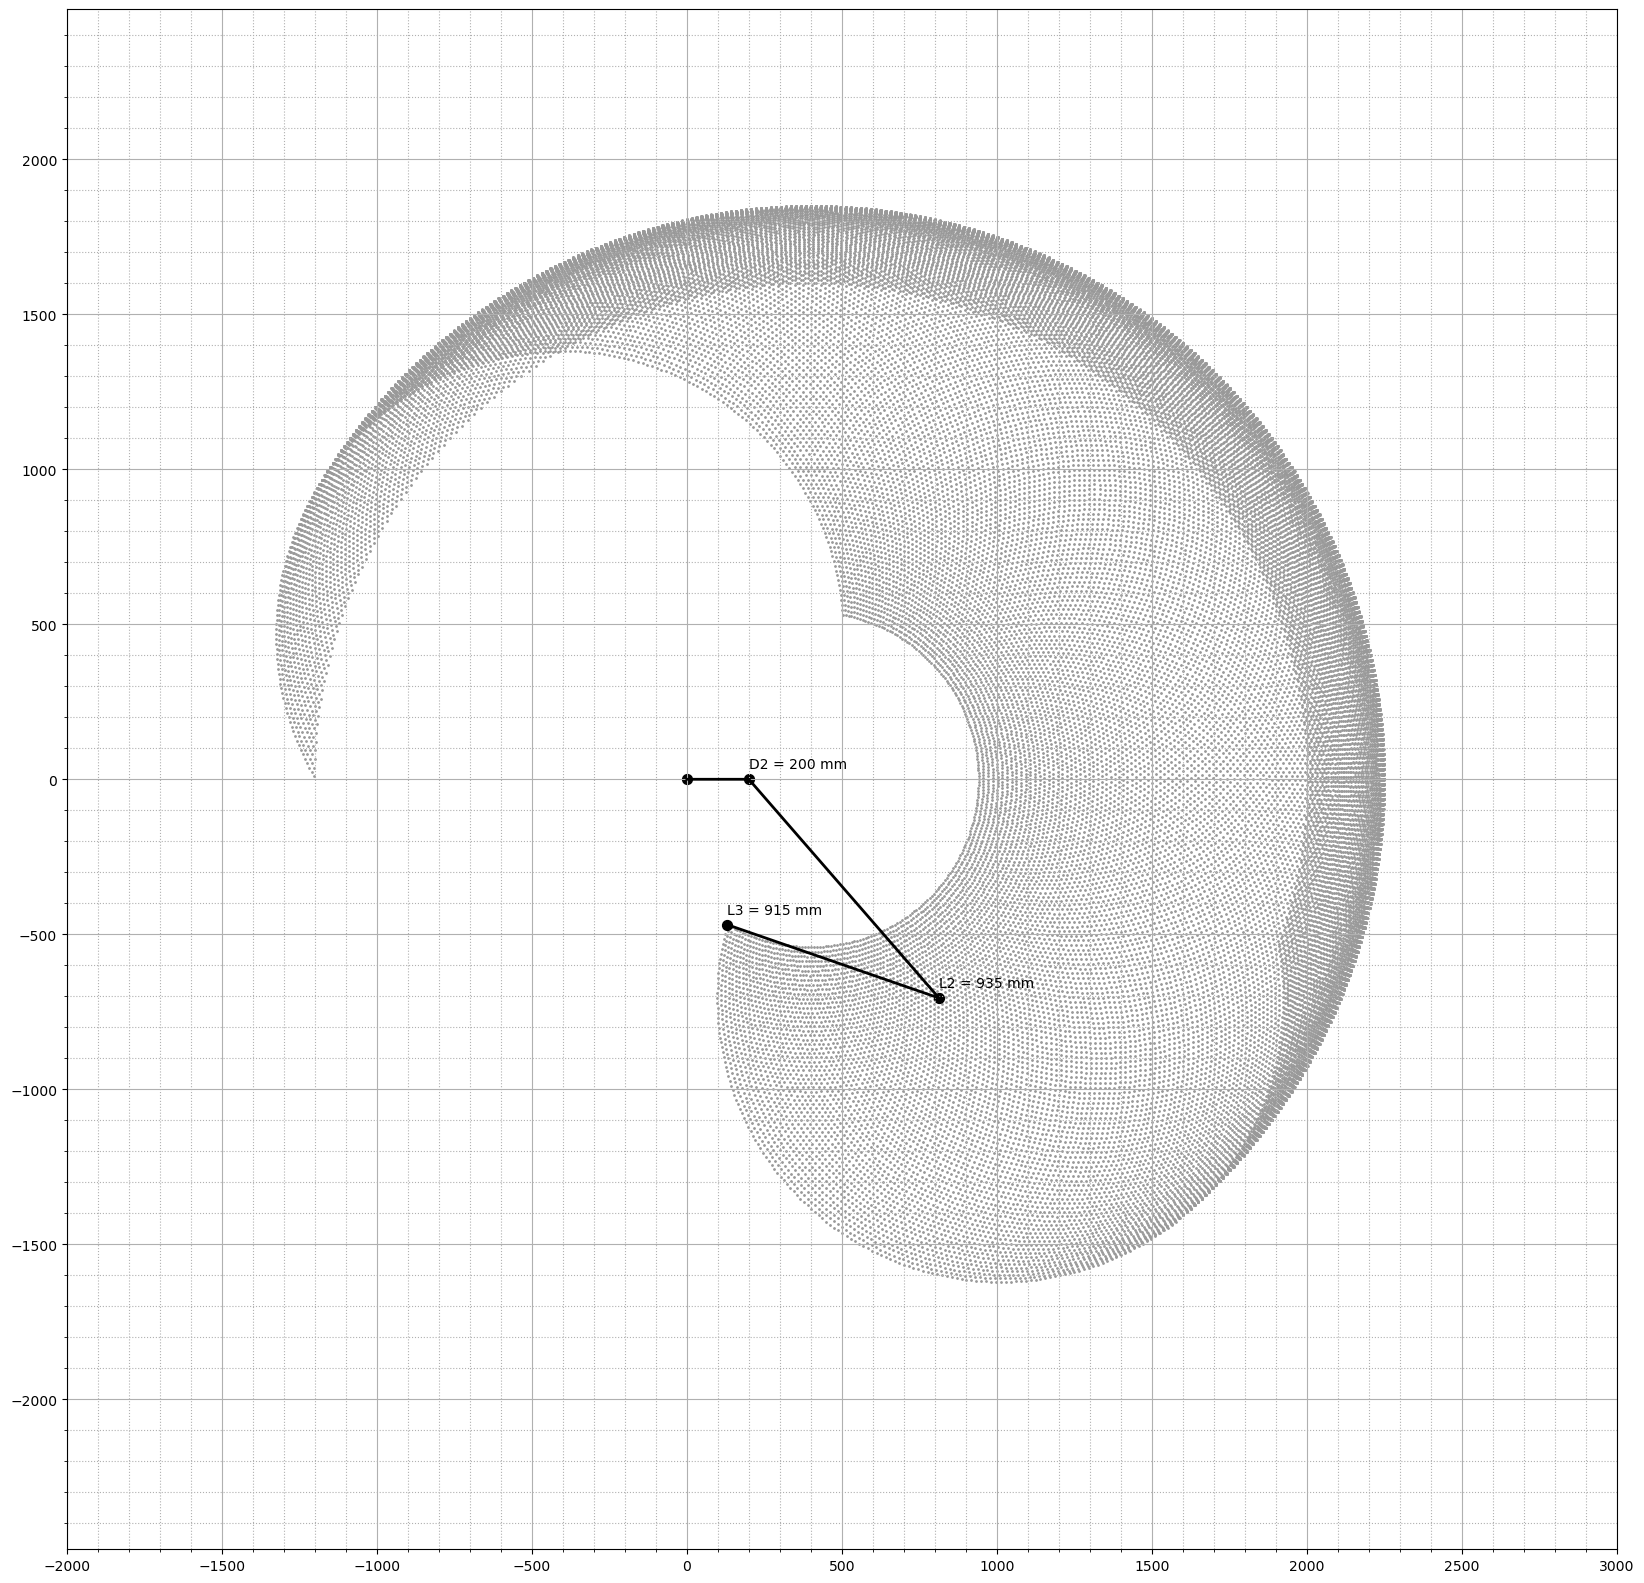

In [65]:
# Spec
D1 = 200;
L1 = 935;
L2 = 915;
J1 = 0;
J2 = 0;
J1min = -139;
J1max = 60;
J2min = -56;
J2max = 150;

# FK
function FK(L1,L2,J1,J2)
    J1 = deg2rad(J1+90);
    J2 = deg2rad(J2-90);    
    X1 = L1*cos(J1) + D1;
    Y1 = L1*sin(J1);
    X2 = X1 + L2*cos(J1+J2) + D1;
    Y2 = Y1 + L2*sin(J1+J2);
    return [X1,Y1], [X2,Y2]
end

# Plot
using PyPlot
#PyPlot.svg(true)

ScatterSize = 1;
ScatterColor = "#999999";
LimSize = 2500;
TickSize = 500;

figure(figsize=(20,20))
axis("equal")

minorticks_on()
grid(b="true", which="minor", linestyle=":")
grid(b="true", which="major", linestyle="-")

xlim(-LimSize+D1*2.5,LimSize+D1*2.5)
ylim(-LimSize,LimSize)
xticks([-LimSize+D1*2.5:TickSize:LimSize+D1*2.5;])
yticks([-LimSize:TickSize:LimSize;])

J1 = J1min;
J2 = J2min;
X = 0;
Y = 0;

for J1=J1min:J1max, J2=J2min:J2max
    A = FK(L1,L2,J1,J2);
    X = vcat(X,A[2][1]);
    Y = vcat(Y,A[2][2]);
end

scatter(X,Y,s=ScatterSize,color=ScatterColor)

# Posture
J1 = J1min;
J2 = J2min;
A = FK(L1,L2,J1,J2);
plot([0,D1,A[1][1],A[2][1]],[0,0,A[1][2],A[2][2]],color="#000000",linewidth=2,linestyle="-")
scatter(0,0,s=50,color="#000000")
scatter(D1,0,s=50,color="#000000")
scatter(A[1][1],A[1][2],s=50,color="#000000")
scatter(A[2][1],A[2][2],s=50,color="#000000")
char_scale = 5;
annotate("D2 = $D1 mm",xy=(D1,0+5*char_scale),ha="left",va="bottom",color="black",fontsize=10)
annotate("L2 = $L1 mm",xy=(A[1][1],A[1][2]+5*char_scale),ha="left",va="bottom",color="black",fontsize=10)
annotate("L3 = $L2 mm",xy=(A[2][1],A[2][2]+5*char_scale),ha="left",va="bottom",color="black",fontsize=10)

savefig("CASE.png")


In [34]:
?annotate

search: annotate




        Annotate the point *xy* with text *text*.

        In the simplest form, the text is placed at *xy*.

        Optionally, the text can be displayed in another position *xytext*.
        An arrow pointing from the text to the annotated point *xy* can then
        be added by defining *arrowprops*.

        Parameters
        ----------
        text : str
            The text of the annotation.  *s* is a deprecated synonym for this
            parameter.

        xy : (float, float)
            The point *(x, y)* to annotate. The coordinate system is determined
            by *xycoords*.

        xytext : (float, float), default: *xy*
            The position *(x, y)* to place the text at. The coordinate system
            is determined by *textcoords*.

        xycoords : str or `.Artist` or `.Transform` or callable or (float, float), default: 'data'

            The coordinate system that *xy* is given in. The following types
            of values are supported:

            -